# Análisis Exploratorio de Datos

El presente análisis exploratorio tiene como propósito comprender la composición y las características principales del conjunto de datos utilizado para el desarrollo del modelo predictivo de detección de diabetes.
A través de esta etapa se busca identificar patrones, tendencias y posibles inconsistencias en la información, así como reconocer variables relevantes que puedan influir en el diagnóstico de la enfermedad.

Este proceso resulta esencial para garantizar la calidad de los datos y orientar las decisiones posteriores de preprocesamiento, selección de variables y construcción del modelo de Machine Learning.

## Carga inicial de datos e importación de librerías

En esta sección se importan las librerías necesarias para el análisis exploratorio y se carga el conjunto de datos original correspondiente al estudio Behavioral Risk Factor Surveillance System (BRFSS 2015).
El archivo contiene información relacionada con diversos indicadores de salud y hábitos de vida de los encuestados, que serán utilizados para construir un modelo predictivo de detección de diabetes.

In [1]:
# Importamos librerias necesarias para realizar el analisis. 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Configuramos las opciones de pandas y seaborn para mejorar la visualización de datos.
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Cargamos el dataset de diabetes y mostramos su tamaño.
df = pd.read_csv('../data/raw/diabetes_012_health_indicators_BRFSS2015.csv')

## Análisis del dataset completo

In [15]:
# Mostramos las primeras filas del dataset para tener una idea de su contenido y estructura.
print(df.head(), '\n')

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0 

In [16]:
# Mostramos informacion general del dataset como tipo de datos y valores nulos
print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [17]:
# Mostramos estadisticas descriptivas del dataset para entender mejor la distribución de los datos.
print(df.describe(), '\n')

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [18]:
# Verificamos la presencia de valores nulos en el dataset.
nulls = df.isnull().sum()
print('Valores nulos por columna:\n', nulls[nulls > 0])

Valores nulos por columna:
 Series([], dtype: int64)


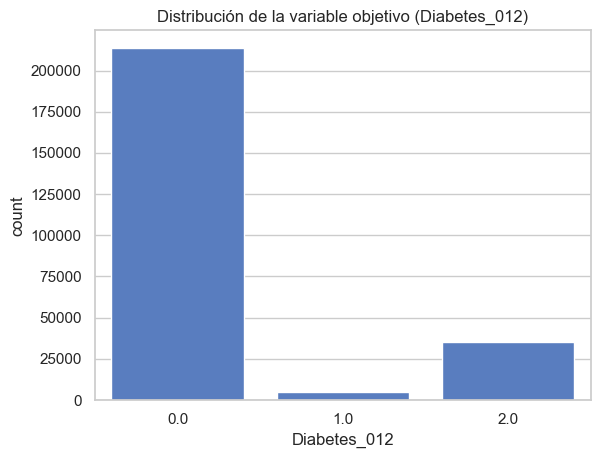

Numero de registros totales:  253680
Número de registros sin diabetes:  213703
Número de registros con prediabetes: 4631
Número de registros con diabetes: 35346 

Proporciones originales: 

Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64


In [19]:
# Analizamos la distribucion de la variable objetivo 'diabetes_012'.
sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribución de la variable objetivo (Diabetes_012)')
plt.show()

# Calculamos el número y porcentaje de registros en cada categoría de la variable objetivo.
sinDiabetes = df[df['Diabetes_012'] == 0]
preDiabetes = df[df['Diabetes_012'] == 1]
conDiabetes2 = df[df['Diabetes_012'] == 2]

print('Numero de registros totales: ', df.shape[0] )
print('Número de registros sin diabetes: ', sinDiabetes.shape[0] )
print('Número de registros con prediabetes:', preDiabetes.shape[0])
print('Número de registros con diabetes:', conDiabetes2.shape[0], '\n')

print("Proporciones originales: \n")
print(df['Diabetes_012'].value_counts(normalize=True))


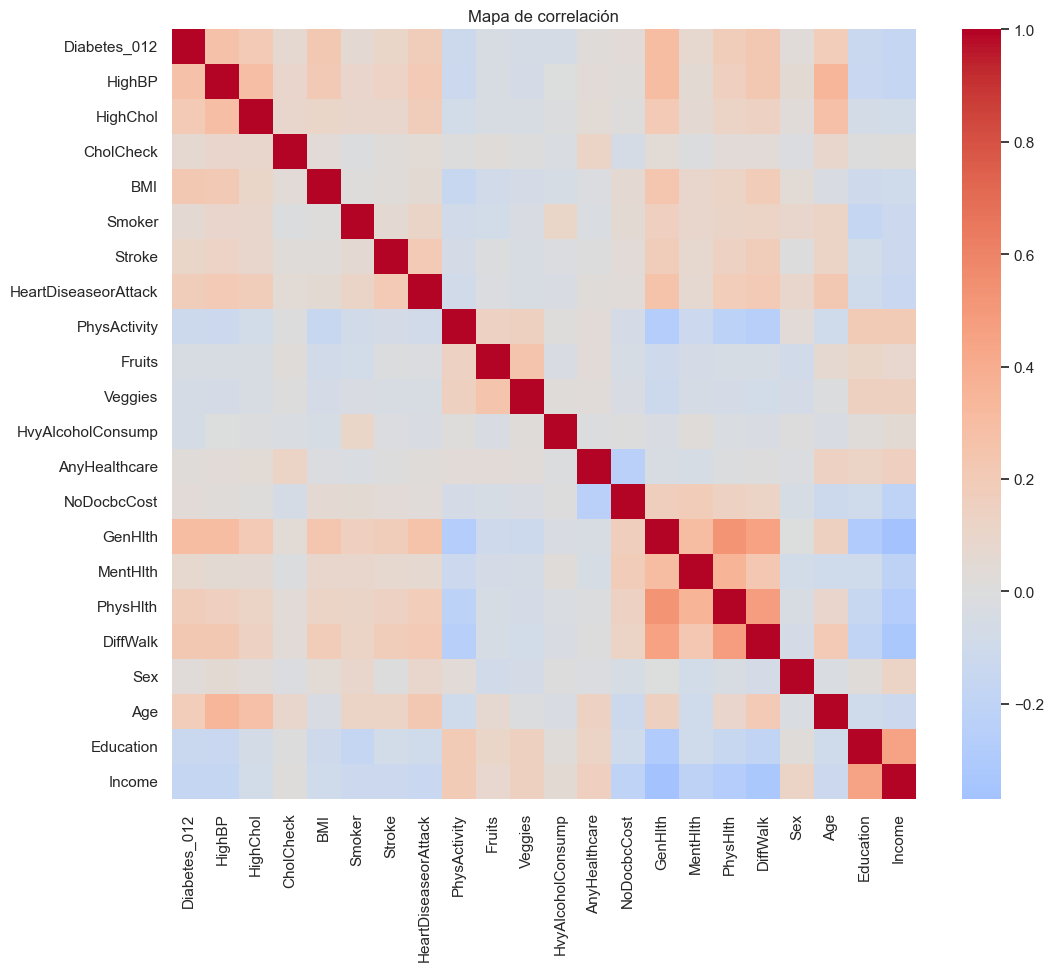

In [20]:
# Analizamos la correlación entre las variables numéricas del dataset.
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Mapa de correlación')
plt.show()

In [21]:
# Calculamos el numero de valores unicos por columna.
print("\nValores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


Valores únicos por columna:
Diabetes_012: 3 valores únicos
HighBP: 2 valores únicos
HighChol: 2 valores únicos
CholCheck: 2 valores únicos
BMI: 84 valores únicos
Smoker: 2 valores únicos
Stroke: 2 valores únicos
HeartDiseaseorAttack: 2 valores únicos
PhysActivity: 2 valores únicos
Fruits: 2 valores únicos
Veggies: 2 valores únicos
HvyAlcoholConsump: 2 valores únicos
AnyHealthcare: 2 valores únicos
NoDocbcCost: 2 valores únicos
GenHlth: 5 valores únicos
MentHlth: 31 valores únicos
PhysHlth: 31 valores únicos
DiffWalk: 2 valores únicos
Sex: 2 valores únicos
Age: 13 valores únicos
Education: 6 valores únicos
Income: 8 valores únicos


## Análisis de la muestra del dataset

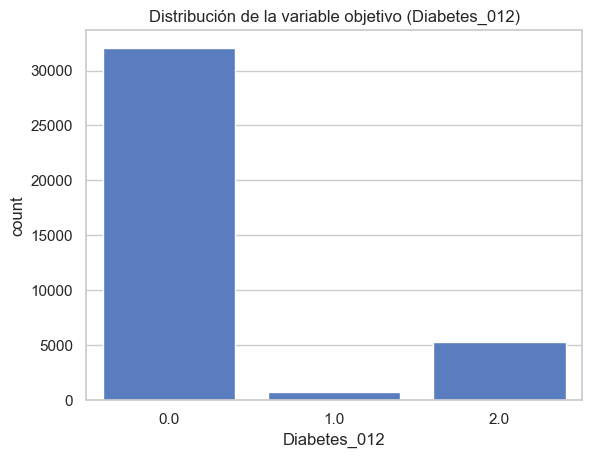

tamaño del dataset muestreado: (38052, 22) 

Numero de registros para la muestra sin diabetes:  32055
Número de registros para la muestra con prediabetes: 695
Número de registros para la muestra con diabetes: 5302 

Diabetes_012
0.0    0.842400
2.0    0.139336
1.0    0.018264
Name: proportion, dtype: float64


In [22]:
frac = 0.15
df_sample, _  = train_test_split(df, 
                                  train_size=frac, 
                                  stratify=df['Diabetes_012'], 
                                  random_state=42)

sns.countplot(x='Diabetes_012', data=df_sample)
plt.title('Distribución de la variable objetivo (Diabetes_012)')
plt.show()

print('tamaño del dataset muestreado:', df_sample.shape,'\n')

sample_sinDiabetes = df_sample[df_sample['Diabetes_012'] == 0]
sample_preDiabetes = df_sample[df_sample['Diabetes_012'] == 1]
sample_conDiabetes2 = df_sample[df_sample['Diabetes_012'] == 2]

print('Numero de registros para la muestra sin diabetes: ', sample_sinDiabetes.shape[0] )
print('Número de registros para la muestra con prediabetes:', sample_preDiabetes.shape[0])
print('Número de registros para la muestra con diabetes:', sample_conDiabetes2.shape[0], '\n')

print(df_sample['Diabetes_012'].value_counts(normalize=True))



In [23]:
print(df_sample.head())

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
195825           0.0     0.0       0.0        1.0  42.0     0.0     0.0   
40483            0.0     0.0       0.0        1.0  19.0     0.0     0.0   
25220            0.0     0.0       0.0        1.0  23.0     0.0     0.0   
162977           0.0     0.0       0.0        1.0  31.0     1.0     0.0   
76227            0.0     0.0       0.0        1.0  28.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
195825                   0.0           1.0     1.0      1.0   
40483                    0.0           1.0     0.0      1.0   
25220                    0.0           1.0     1.0      1.0   
162977                   0.0           1.0     1.0      1.0   
76227                    0.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
195825                0.0            1.0          1.0      3.0       0.0   
40483             

In [24]:
sample_nulls = df_sample.isnull().sum()
print('Valores nulos por columna en la muestra:\n', sample_nulls[sample_nulls > 0])

Valores nulos por columna en la muestra:
 Series([], dtype: int64)


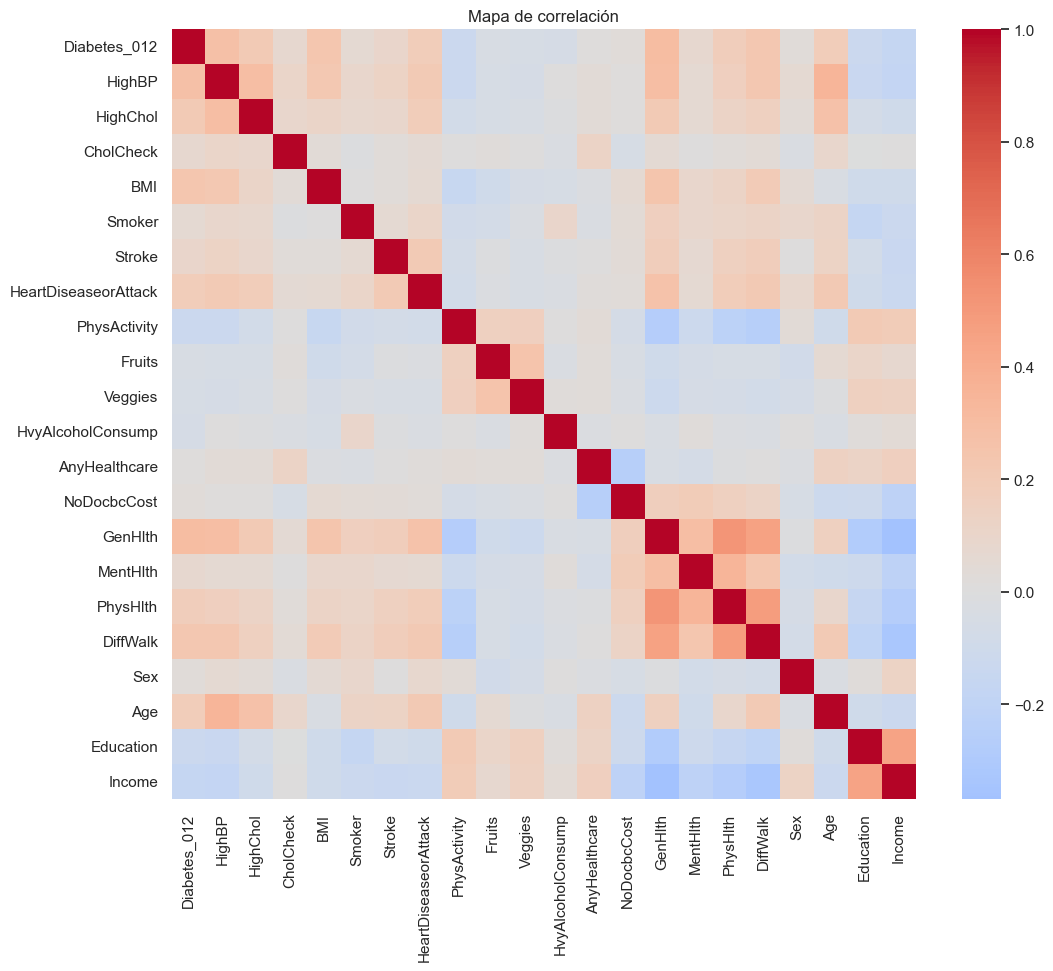

In [25]:
corr_sample = df_sample.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr_sample, cmap='coolwarm', center=0)
plt.title('Mapa de correlación')
plt.show()